<a href="https://colab.research.google.com/github/AayushA10/BASIC-CALCULATOR-USING-PHP/blob/main/DS_WEEK_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-d1930ab5b3a1>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


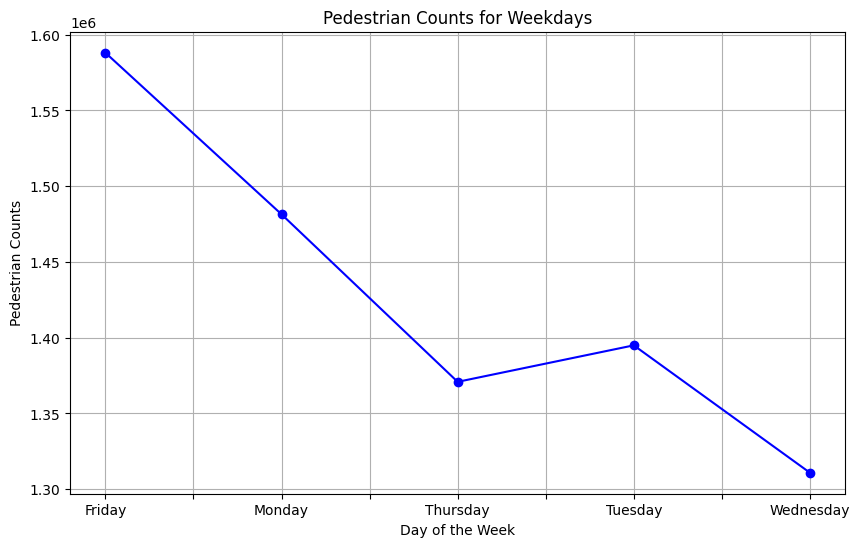

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df['DayOfWeek'] = df['hour_beginning'].dt.dayofweek

weekdays_df = df[df['DayOfWeek'].isin([0, 1, 2, 3, 4])]

weekday_counts = weekdays_df.groupby(df['hour_beginning'].dt.strftime('%A'))['Pedestrians'].sum()

weekday_counts.plot(kind='line', marker='o', figsize=(10, 6), color='blue')
plt.title('Pedestrian Counts for Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Pedestrian Counts')
plt.grid(True)
plt.show()


<ipython-input-5-689e06523df0>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


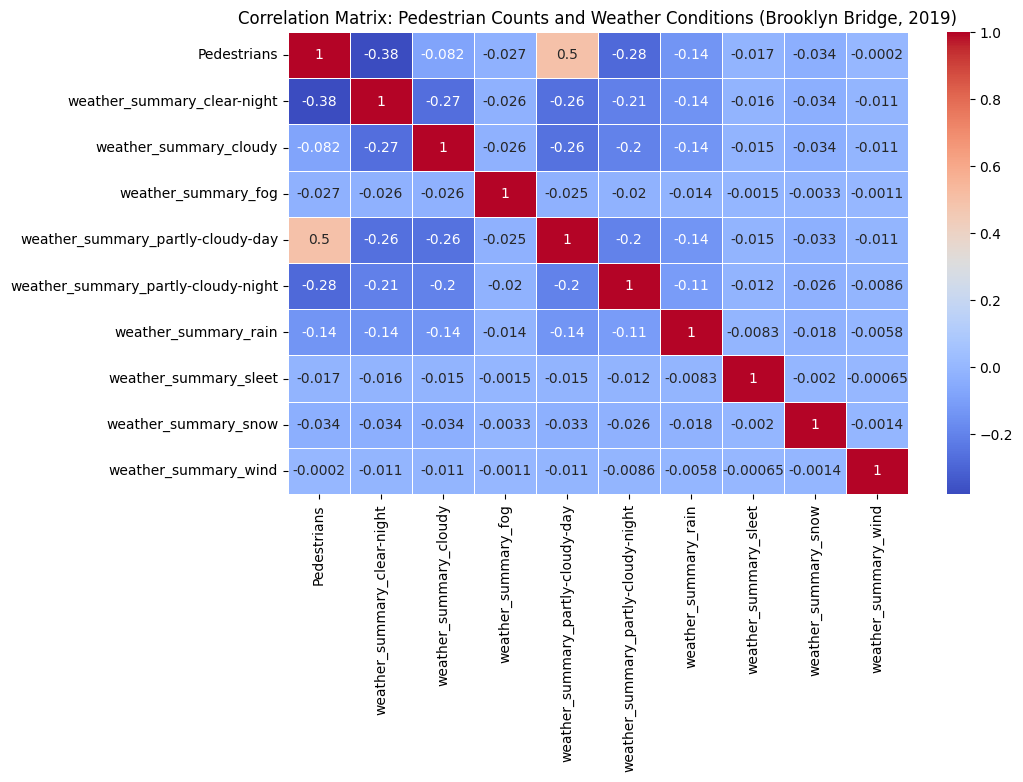

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


df_2019 = df[df['hour_beginning'].dt.year == 2019]

df_2019_brooklyn = df_2019[df_2019['location'].str.contains('Brooklyn Bridge', case=False, na=False)]


df_2019_brooklyn = df_2019_brooklyn[['Pedestrians', 'weather_summary']].dropna()

df_encoded = pd.get_dummies(df_2019_brooklyn, columns=['weather_summary'], drop_first=True)


correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Pedestrian Counts and Weather Conditions (Brooklyn Bridge, 2019)')
plt.show()


<ipython-input-6-63eb19603bda>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


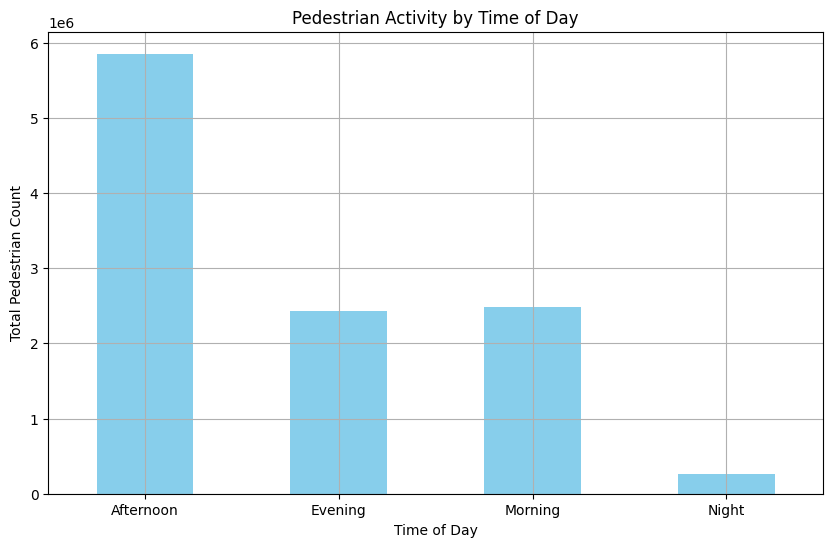

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)


df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


df['time_of_day'] = df['hour_beginning'].dt.hour.apply(categorize_time_of_day)


time_of_day_activity = df.groupby('time_of_day')['Pedestrians'].sum()


time_of_day_activity.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Pedestrian Activity by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Pedestrian Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()
